[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zjelveh/zjelveh.github.io/blob/master/files/cfc/9_merging.ipynb)

**IMPORTANT**: Save your own copy!
1. Click File → Save a copy in Drive
2. Rename it
3. Work in YOUR copy, not the original

---

# 9. Merging DataFrames
## CCJS 418E: Coding for Criminology

**Today's Goals:**
- Understand why we need to merge datasets
- Learn the four types of merges (inner, left, right, outer)
- Practice combining datasets with different structures
- Apply merging to NYPD arrest data to answer real questions

**The Big Question:** How do we combine information from different sources to add context to our analysis?

---

**📝 Connection to Problem Set 3:**

This lecture teaches the merging skills you'll need for **Problem Set 3 (COVID-19 and NYPD Arrests)**. Specifically:
- **Task 3.1** (Calculate arrest rates by borough) → Uses Pattern 1: Aggregate-Merge-Back
- **Task 3.2** (Felony percentage by borough) → Uses Pattern 2: Merge Two Aggregations
- **Task 3.3** (Percentage change by borough) → Uses basic merge with filtered DataFrames
- **Task 5.2** (Which offenses never recovered?) → Uses merge of two aggregations by offense type

Watch for **📝 PS3 Connection** callouts throughout this lecture!

## Setup: Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

print("Libraries loaded!")

Libraries loaded!


## Part 1: Why Do We Need Merging?

Imagine you're analyzing crime data and you have:
- Dataset 1: Individual arrest records (who, when, where)
- Dataset 2: Borough-level crime statistics (total crimes, crime rates)

**Question:** Which arrests happened in high-crime areas?

To answer this, we need to **merge** (combine) these datasets!

### Real-World Examples of Merging:
- Linking program participation data with arrest outcomes
- Combining demographic data with crime statistics
- Adding neighborhood context to individual incidents

## Part 2: Understanding Merge Basics

### Example: Program Enrollment and Income Data

Let's start with a simple scenario:
- We have people who enrolled in a job training program
- We have their income data
- Each person appears **once** in each dataset

This is called a **one-to-one merge**.

In [ ]:
# Create sample program enrollment data
program_df = pd.DataFrame({
    'person_id': [1, 2, 3, 4],
    'program_completed': ['Yes', 'No', 'Yes', 'Yes']
})

program_df

In [ ]:
# Create sample income data
income_df = pd.DataFrame({
    'person_id': [1, 2, 3, 4],
    'monthly_income': [2500, 1800, 3000, 2700]
})

income_df

### Performing a Merge

The `pd.merge()` function combines two DataFrames based on a common column (the **key**).

**Basic syntax:**
```python
pd.merge(left=df1, right=df2, on='column_name')
```

- `left` and `right`: The two DataFrames to merge
- `on`: The column(s) to match on

In [ ]:
# Merge the datasets on person_id
merged_df = pd.merge(left=program_df, right=income_df, on='person_id')

merged_df

**What happened?**
- Pandas matched rows where `person_id` was the same
- It combined the columns from both DataFrames
- Each person now has both program and income information

### Using the Merged Data

Now we can answer questions that require information from both datasets!

In [5]:
# Calculate average income by program completion
avg_income = merged_df.groupby('program_completed')['monthly_income'].mean()

print("Average income by program completion:")
avg_income

Average income by program completion:


program_completed
No     1800.000000
Yes    2733.333333
Name: monthly_income, dtype: float64

In [ ]:
# Visualize the comparison
sns.barplot(data=merged_df,
 x='program_completed',
  y='monthly_income', 
  errorbar=None)

## Part 3: One-to-Many Merges

Sometimes one dataset has **multiple rows** for each ID. 

**Example:** We track people's monthly income over time
- Program data: 1 row per person
- Income data: multiple rows per person (one per month)

This is called a **one-to-many merge**.

In [ ]:
# Program data stays the same
program_df2 = pd.DataFrame({
    'person_id': [1, 2, 3],
    'program_completed': ['Yes', 'No', 'Yes']
})

program_df2

In [ ]:
# Income data now has multiple months per person
income_df2 = pd.DataFrame({
    'person_id': [1, 1, 1, 2, 2, 3],
    'month': ['Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Jan'],
    'monthly_income': [2500, 2600, 2700, 1800, 1900, 3000]
})

income_df2

In [ ]:
# Perform the merge
merged_df2 = pd.merge(left=program_df2, right=income_df2, on='person_id')

merged_df2

**What happened?**
- Person 1 appears 3 times (once for each month)
- Person 2 appears 2 times (once for each month)
- Person 3 appears 1 time (only one month of data)

**Key insight:** The program information gets **repeated** for each income record!

This is normal and expected in one-to-many merges.

## Part 4: Types of Merges

What if some people appear in one dataset but not the other?

There are **4 types of merges** that handle this differently:

1. **Inner merge** (`how='inner'`): Keep only people who appear in **BOTH** datasets
2. **Left merge** (`how='left'`): Keep **ALL** people from left dataset
3. **Right merge** (`how='right'`): Keep **ALL** people from right dataset
4. **Outer merge** (`how='outer'`): Keep **ALL** people from **BOTH** datasets

### Example Scenario: Some Overlap

Let's create data where:
- Some people are in the program but don't have arrest records
- Some people have arrest records but weren't in the program

In [ ]:
# Program data
program_df3 = pd.DataFrame({
    'person_id': [1, 2, 3, 4],
    'program_completed': ['Yes', 'No', 'Yes', 'Yes']
})

program_df3

In [ ]:
# Arrest data - notice some different person_ids
arrest_df = pd.DataFrame({
    'person_id': [1, 2, 5, 6],
    'arrested': ['No', 'Yes', 'Yes', 'No']
})

arrest_df

**Who appears where?**
- Person 1, 2: In BOTH datasets
- Person 3, 4: Only in program data
- Person 5, 6: Only in arrest data

Let's see how different merge types handle this!

### Type 1: Inner Merge (Only Matches)

**Use when:** You only want complete cases where data exists in both datasets

In [ ]:
inner_merge = pd.merge(program_df3, arrest_df, on='person_id', how='inner')

inner_merge

**Result:** Only person 1 and 2 (they appear in both datasets)

### Type 2: Left Merge (Keep All From Left)

**Use when:** You want to keep all records from the first (left) dataset

In [ ]:
left_merge = pd.merge(program_df3, arrest_df, on='person_id', how='left')

left_merge

**Result:** 
- All 4 people from program data
- Person 3 and 4 have `NaN` for arrested (no arrest data for them)

**NaN means:** No matching record in the right dataset

### Type 3: Right Merge (Keep All From Right)

**Use when:** You want to keep all records from the second (right) dataset

In [ ]:
right_merge = pd.merge(program_df3, arrest_df, on='person_id', how='right')

right_merge

**Result:**
- All 4 people from arrest data
- Person 5 and 6 have `NaN` for program_completed (no program data for them)

### Type 4: Outer Merge (Keep All From Both)

**Use when:** You want to keep everyone from both datasets

In [ ]:
outer_merge = pd.merge(program_df3, arrest_df, on='person_id', how='outer')

outer_merge

**Result:**
- All 6 people (1, 2, 3, 4, 5, 6)
- NaN values where data is missing from one dataset

---

**📝 PS3 Connection: Task 3.3**

In Problem Set 3, you'll merge filtered DataFrames for different years:
```python
# Filter to 2019
df_2019 = borough_year_df[borough_year_df['year'] == 2019]

# Filter to 2020
df_2020 = borough_year_df[borough_year_df['year'] == 2020]

# Merge to compare years
change_df = pd.merge(df_2019, df_2020, on='ARREST_BORO', how='inner')
```

You'll use the **inner merge** type because you only want boroughs that appear in BOTH years (which will be all of them). This pattern lets you calculate percentage change: `(2020 - 2019) / 2019 * 100`

/tmp/ipykernel_97079/2117214030.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merge_comparison, x='Merge Type', y='Number of Rows', palette='Set2')


<Axes: xlabel='Merge Type', ylabel='Number of Rows'>

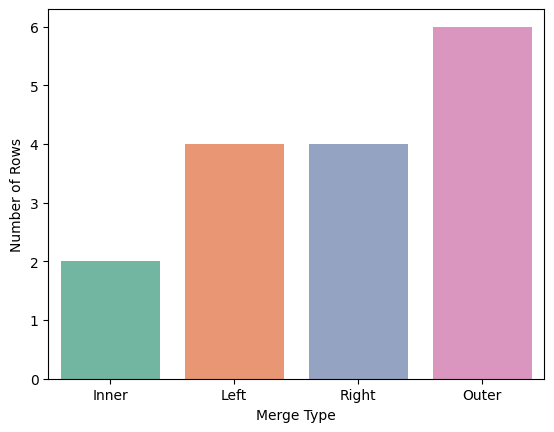

In [15]:
# Visualize merge types comparison
merge_comparison = pd.DataFrame({
    'Merge Type': ['Inner', 'Left', 'Right', 'Outer'],
    'Number of Rows': [len(inner_merge), len(left_merge), len(right_merge), len(outer_merge)]
})

sns.barplot(data=merge_comparison, x='Merge Type', y='Number of Rows', palette='Set2')

## Part 5: Real Data - NYPD Arrests

Now let's apply merging to real data!

We'll use the NYPD arrest data you've seen before (from the police pullback study).

In [16]:
# Load NYPD arrest data
df = pd.read_csv('https://raw.githubusercontent.com/zjelveh/zjelveh.github.io/refs/heads/master/files/cfc/nypd_arrests_2013_2015_garner.csv')

# Convert date to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

print(f"Loaded {len(df):,} arrest records")
df.head()

Loaded 1,026,807 arrest records


,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,148725946,2015-12-21,NaN,NaN,M,K,61,45-64,M,WHITE
1,148630763,2015-12-17,NaN,NaN,M,M,28,18-24,M,BLACK
2,148445695,2015-12-10,JOSTLING,JOSTLING,M,K,81,25-44,M,BLACK
3,148429830,2015-12-10,SODOMY 3,SEX CRIMES,F,B,42,25-44,M,BLACK
4,147917492,2015-11-19,RAPE 1,RAPE,F,B,44,45-64,M,BLACK


## Pattern 1: Aggregate Statistics, Then Merge Back

**Goal:** Add context to individual arrests by merging in aggregate statistics

**Question:** Which arrests happened in high-crime boroughs?

### Step 1: Explore Borough-Level Crime

In [17]:
# Count arrests by borough
arrests_by_boro = df.groupby('ARREST_BORO').size()

print("Arrests by Borough:")
arrests_by_boro

Arrests by Borough:


ARREST_BORO
B    238805
K    277086
M    274622
Q    199359
S     36935
dtype: int64

/tmp/ipykernel_97079/2659070011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=arrests_by_boro_df, x='ARREST_BORO', y='count', palette='Set2')


<Axes: xlabel='ARREST_BORO', ylabel='count'>

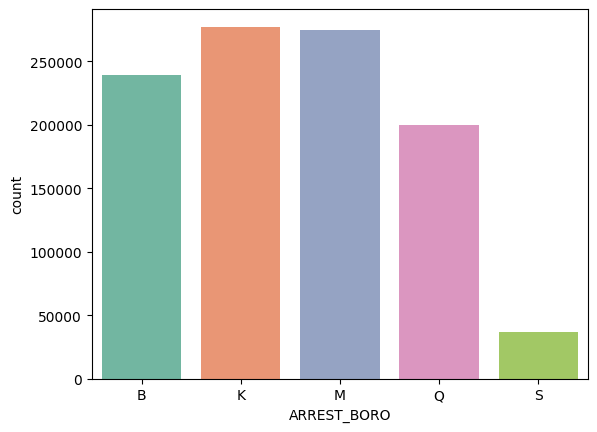

In [18]:
# Visualize
arrests_by_boro_df = arrests_by_boro.reset_index(name='count')
sns.barplot(data=arrests_by_boro_df, x='ARREST_BORO', y='count', palette='Set2')

### Step 2: Create Borough Statistics

Let's calculate:
- Total arrests per borough
- Percentage of all arrests

In [ ]:
# Create borough-level statistics
boro_stats = df.groupby('ARREST_BORO').size().reset_index(name='boro_total_arrests')

# Calculate percentage
boro_stats['boro_pct'] = (boro_stats['boro_total_arrests'] / len(df)) * 100

boro_stats

**Important:** Notice we used `.reset_index()` to turn the result into a DataFrame!

This is necessary for merging.

### Step 3: Merge Borough Stats Back to Arrests

Now we'll add these borough statistics to **every arrest** in that borough.

In [20]:
# Merge borough stats back to individual arrests
arrests_with_context = df.merge(boro_stats, on='ARREST_BORO', how='left')

print(f"Original arrests: {len(df):,}")
print(f"After merge: {len(arrests_with_context):,}")
print("\nFirst 10 rows:")
arrests_with_context[['ARREST_BORO', 'OFNS_DESC', 'boro_total_arrests', 'boro_pct']].head(10)

Original arrests: 1,026,807
After merge: 1,026,807

First 10 rows:


,ARREST_BORO,OFNS_DESC,boro_total_arrests,boro_pct
0,K,NaN,277086,26.985208
1,M,NaN,274622,26.745240
2,K,JOSTLING,277086,26.985208
3,B,SEX CRIMES,238805,23.257048
4,B,RAPE,238805,23.257048
5,M,JOSTLING,274622,26.745240
6,M,NaN,274622,26.745240
7,B,NaN,238805,23.257048
8,M,NaN,274622,26.745240
9,Q,RAPE,199359,19.415431


**What happened?**
- Each arrest now has its borough's statistics attached
- Brooklyn arrests all show 304,498 total arrests (repeated for each arrest)
- The number of rows stayed the same (we used left merge)

This is the **aggregate-merge-back pattern**!

### Step 4: Use the Merged Data

Now we can answer questions that need both arrest details AND borough context!

In [21]:
# Create high-crime borough flag
median_arrests = boro_stats['boro_total_arrests'].median()
arrests_with_context['high_crime_boro'] = arrests_with_context['boro_total_arrests'] > median_arrests

print(f"Median arrests per borough: {median_arrests:,}")
print("\nHigh-crime boroughs:")
arrests_with_context.groupby('ARREST_BORO')['high_crime_boro'].first()

Median arrests per borough: 238,805.0

High-crime boroughs:


ARREST_BORO
B    False
K     True
M     True
Q    False
S    False
Name: high_crime_boro, dtype: bool

In [22]:
# Answer: What percentage of violent arrests happened in high-crime boroughs?
violent_arrests = arrests_with_context[arrests_with_context['LAW_CAT_CD'] == 'F']
pct_in_high_crime = (violent_arrests['high_crime_boro'].sum() / len(violent_arrests)) * 100

print(f"Percentage of felony arrests in high-crime boroughs: {pct_in_high_crime:.1f}%")

print("\n" + "="*70)
print("📝 PS3 CONNECTION: Task 3.1 - Calculate arrest rates by borough")
print("="*70)
print("\nIn Problem Set 3, you'll use this EXACT pattern:")
print("1. Create total arrests per YEAR (one number per year)")
print("2. Create arrests by BOROUGH and YEAR (multiple rows)")
print("3. MERGE the yearly totals back to the borough-year data")
print("4. Calculate: pct_of_total = (borough_arrests / total_arrests) * 100")
print("\nThe key insight: Aggregate at ONE level (year), then merge back")
print("to a MORE DETAILED level (borough-year).")
print("="*70)

Percentage of felony arrests in high-crime boroughs: 53.2%

📝 PS3 CONNECTION: Task 3.1 - Calculate arrest rates by borough

In Problem Set 3, you'll use this EXACT pattern:
1. Create total arrests per YEAR (one number per year)
2. Create arrests by BOROUGH and YEAR (multiple rows)
3. MERGE the yearly totals back to the borough-year data
4. Calculate: pct_of_total = (borough_arrests / total_arrests) * 100

The key insight: Aggregate at ONE level (year), then merge back
to a MORE DETAILED level (borough-year).


## Pattern 2: Merge Two Aggregations

**Goal:** Compare statistics from different groupings

**Question:** Do certain offense types concentrate in specific boroughs?

### Step 1: Create Borough Statistics

In [ ]:
# Borough-level statistics (we already have this)
boro_stats

### Step 2: Create Offense Statistics

In [ ]:
# Count arrests by offense type
offense_counts = df.groupby('OFNS_DESC').size().reset_index(name='offense_total_arrests')

# Get top 5 most common offenses
offense_stats = offense_counts.nlargest(5, 'offense_total_arrests')

# Calculate percentage
offense_stats['offense_pct'] = (offense_stats['offense_total_arrests'] / len(df)) * 100

offense_stats

In [ ]:
# Visualize offense distribution
sns.barplot(data=offense_stats, x='OFNS_DESC', y='offense_total_arrests', palette='Set2')

### Step 3: Create Cross-Tabulation

Now we need to count arrests by **BOTH** borough AND offense type.

This creates a "bridge" between our two aggregations.

In [ ]:
# Filter to only top 5 offenses
top_offenses = offense_stats['OFNS_DESC'].tolist()
df_top = df[df['OFNS_DESC'].isin(top_offenses)]

# Count by BOTH borough and offense
cross_tab = df_top.groupby(['ARREST_BORO', 'OFNS_DESC']).size().reset_index(name='count')

cross_tab.head(10)

**What is this?**
- Each row is a borough-offense combination
- Shows how many arrests of each type in each borough
- Multiple rows per borough (one for each offense)

### Step 4: Merge the Aggregations

Now we merge our cross-tab with both sets of statistics!

In [ ]:
# First merge: add borough statistics
merged_stats = cross_tab.merge(boro_stats, on='ARREST_BORO', how='left')

# Second merge: add offense statistics  
merged_stats = merged_stats.merge(offense_stats, on='OFNS_DESC', how='left')

merged_stats.head(10)

### Step 5: Use the Merged Statistics

Now we can calculate interesting comparisons!

In [ ]:
# Calculate: What share of this offense happens in this borough?
merged_stats['pct_of_offense_in_boro'] = (merged_stats['count'] / merged_stats['offense_total_arrests']) * 100

# Calculate: What share of this borough's arrests is this offense?
merged_stats['pct_of_boro_is_offense'] = (merged_stats['count'] / merged_stats['boro_total_arrests']) * 100

merged_stats[['ARREST_BORO', 'OFNS_DESC', 'count', 'pct_of_offense_in_boro', 'pct_of_boro_is_offense']].head(10)

In [ ]:
# Find combinations where offense is over-represented in borough
# Over-represented = happens more in this borough than expected
merged_stats_sorted = merged_stats.sort_values('pct_of_offense_in_boro', ascending=False)

print("Top 10 Borough-Offense Concentrations:")
merged_stats_sorted[['ARREST_BORO', 'OFNS_DESC', 'count', 'pct_of_offense_in_boro']].head(10)

print("\n" + "="*70)
print("📝 PS3 CONNECTION: Task 3.2 - Felony Percentage by Borough")
print("="*70)
print("\nIn Problem Set 3, you'll use this pattern to merge TWO aggregations:")
print()
print("Table 1: Total arrests by borough and year")
print("  → df.groupby(['ARREST_BORO', 'year']).size()")
print()
print("Table 2: FELONY arrests by borough and year")
print("  → felonies.groupby(['ARREST_BORO', 'year']).size()")
print()
print("Merge these on BOTH 'ARREST_BORO' AND 'year'")
print("Then calculate: felony_pct = (felony_arrests / total_arrests) * 100")
print()
print("This shows: Which boroughs shifted toward more serious enforcement?")
print("="*70)

## Quick Reference: Merge Patterns

### Pattern 1: Aggregate-Merge-Back
**Use when:** You want to add context to individual records

**📝 PS3 Tasks:** Task 3.1 (arrest rates by borough)

```python
# Step 1: Create aggregation
stats = df.groupby('group_col').size().reset_index(name='total')

# Step 2: Merge back
df_with_context = df.merge(stats, on='group_col', how='left')

# Step 3: Use merged data
df_with_context['flag'] = df_with_context['total'] > threshold
```

**PS3 Example:**
```python
# Step 1: Total arrests per year
year_totals = df.groupby('year').size().reset_index(name='total_arrests')

# Step 2: Borough-year arrests
borough_year = df.groupby(['ARREST_BORO', 'year']).size().reset_index(name='arrests')

# Step 3: Merge year totals back
borough_year = borough_year.merge(year_totals, on='year')

# Step 4: Calculate percentage
borough_year['pct_of_total'] = (borough_year['arrests'] / borough_year['total_arrests']) * 100
```

---

### Pattern 2: Merge-Two-Aggregations
**Use when:** You want to compare statistics from different groupings

**📝 PS3 Tasks:** Task 3.2 (felony percentage), Task 5.2 (offense recovery rates)

```python
# Step 1: Create first aggregation
stats1 = df.groupby('group1').size().reset_index(name='total1')

# Step 2: Create second aggregation
stats2 = df.groupby('group2').size().reset_index(name='total2')

# Step 3: Create cross-tabulation
cross = df.groupby(['group1', 'group2']).size().reset_index(name='count')

# Step 4: Merge both
merged = cross.merge(stats1, on='group1')
merged = merged.merge(stats2, on='group2')
```

**PS3 Example:**
```python
# Table 1: Total arrests by borough-year
total_arrests = df.groupby(['ARREST_BORO', 'year']).size().reset_index(name='total')

# Table 2: Felony arrests by borough-year
felonies = df[df['LAW_CAT_CD'] == 'F']
felony_arrests = felonies.groupby(['ARREST_BORO', 'year']).size().reset_index(name='felonies')

# Merge them
merged = total_arrests.merge(felony_arrests, on=['ARREST_BORO', 'year'])

# Calculate percentage
merged['felony_pct'] = (merged['felonies'] / merged['total']) * 100
```

---

### Pattern 3: Compare Filtered DataFrames
**Use when:** You want to compare the same metric across different conditions

**📝 PS3 Tasks:** Task 3.3 (2019 vs 2020 comparison), Task 5.2 (2019 vs 2021 comparison)

```python
# Step 1: Create aggregation for condition 1
df_condition1 = df[df['condition_col'] == 'value1']
stats1 = df_condition1.groupby('group_col').size().reset_index(name='count1')

# Step 2: Create aggregation for condition 2
df_condition2 = df[df['condition_col'] == 'value2']
stats2 = df_condition2.groupby('group_col').size().reset_index(name='count2')

# Step 3: Merge
comparison = stats1.merge(stats2, on='group_col', how='inner')

# Step 4: Calculate change
comparison['pct_change'] = ((comparison['count2'] - comparison['count1']) / comparison['count1']) * 100
```

**PS3 Example:**
```python
# Filter to 2019 and 2020
borough_year_df = df.groupby(['ARREST_BORO', 'year']).size().reset_index(name='arrests')

df_2019 = borough_year_df[borough_year_df['year'] == 2019]
df_2020 = borough_year_df[borough_year_df['year'] == 2020]

# Merge to compare
change = df_2019.merge(df_2020, on='ARREST_BORO', suffixes=('_2019', '_2020'))

# Calculate percentage change
change['pct_change'] = ((change['arrests_2020'] - change['arrests_2019']) / change['arrests_2019']) * 100
```

## Practice Exercises

Use the NYPD data to answer these questions:

### Exercise 1: Day-of-Week Context

Create day-of-week statistics and merge them back to arrests.

**Steps:**
1. Extract day of week from ARREST_DATE
2. Count arrests by day of week
3. Merge day statistics back to arrests
4. Find which arrests happened on high-crime days

**Question:** What percentage of weekend arrests happened on the busiest day?

In [ ]:
# Your code here


### Exercise 2: Offense-Borough Patterns

Compare misdemeanor vs felony patterns across boroughs.

**Steps:**
1. Create borough statistics
2. Create crime category statistics (LAW_CAT_CD)
3. Create cross-tab of both
4. Merge all together

**Question:** Which borough has the highest percentage of misdemeanors?

In [ ]:
# Your code here


### Exercise 3: High-Frequency Offenses

Identify arrests for "high-frequency" offense types.

**Steps:**
1. Count arrests by offense description
2. Flag offenses with > 10,000 arrests as "high frequency"
3. Merge this flag back to arrests
4. Compare characteristics of high vs low frequency arrests

**Question:** Do high-frequency offenses have different borough distributions?

In [ ]:
# Your code here


## Summary

Today you learned:

### Merge Fundamentals
- **Why merge:** Combine information from different sources
- **How merge works:** Match rows based on common column(s)
- **Four merge types:**
  - Inner: only matches
  - Left: all from left dataset
  - Right: all from right dataset
  - Outer: all from both datasets

### Three Key Patterns
1. **Aggregate-Merge-Back:** Add context to individual records
2. **Merge-Two-Aggregations:** Compare different groupings
3. **Compare-Filtered-DataFrames:** Calculate changes between conditions

### Important Concepts
- **One-to-one merge:** Each ID appears once in both datasets
- **One-to-many merge:** ID appears multiple times in one dataset
- **NaN values:** Indicate no match was found
- **Reset index:** Necessary to make groupby results mergeable

---

## 📝 Problem Set 3 Roadmap

You now have ALL the tools you need for the merging tasks in PS3:

**Task 3.1: Calculate arrest rates by borough**
- Use **Pattern 1** (Aggregate-Merge-Back)
- Aggregate yearly totals, merge back to borough-year data
- Calculate percentages

**Task 3.2: Felony percentage by borough**
- Use **Pattern 2** (Merge-Two-Aggregations)
- Create total arrests table and felony arrests table
- Merge them together, calculate felony percentage

**Task 3.3: Percentage change by borough (2019→2020)**
- Use **Pattern 3** (Compare-Filtered-DataFrames)
- Filter to 2019, filter to 2020
- Merge them, calculate percentage change

**Task 5.2: Which offense types never recovered? (2019 vs 2021)**
- Use **Pattern 3** again
- Same approach as Task 3.3, but comparing offense types instead of boroughs

**Key Success Tips:**
1. Always use `.reset_index()` after `groupby()` before merging
2. Name your columns clearly (use `name=` parameter in `reset_index()`)
3. Check your merge results: does the row count make sense?
4. Use `how='inner'` when comparing years (you want only matching records)
